In [ ]:
import warnings
from math import sqrt
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gold = pd.read_csv('drive/MyDrive/tez_datas/gold_dataset.csv', header=0, index_col=0, squeeze=True)["Close"]
gold=gold[int(len(gold.values)*0.9):]

In [ ]:
Gold= pd.read_csv('drive/MyDrive/tez_datas/present_data.csv', header=0, index_col=0, squeeze=True)["Gold"]
Gold

Date
2003-12-01     402.700012
2003-12-02     403.700012
2003-12-03     403.899994
2003-12-04     403.299988
2003-12-05     406.399994
                 ...     
2019-12-19    1478.199951
2019-12-20    1474.699951
2019-12-23    1482.500000
2019-12-27    1513.800049
2019-12-30    1514.500000
Name: Gold, Length: 3028, dtype: float64

In [ ]:
predicitons=list()
from sklearn.metrics import accuracy_score
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.9)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse,predictions,model_fit
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg, best_aic = float("inf"), None, float("inf")
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse, predictions,model_fit = evaluate_arima_model(dataset, order)
                    normalized_rmse=rmse/(max(gold.values)-min(gold.values))
                    aic=model_fit.aic
                    if normalized_rmse < best_score:
                      if aic < best_aic:
                        best_score, best_cfg,best_aic = normalized_rmse, order, aic
                        model_fit.save('model.pkl')
                    print('ARIMA%s norm_RMSE=%f AIC=%f' % (order,normalized_rmse,aic))
                except:
                    continue
    print('Best ARIMA%s norm_RMSE=%f AIC=%f' % (best_cfg, best_score,best_aic))
    return predictions

In [ ]:
# evaluate parameters
p_values = [0,1,2,4,6,8,10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
predictions=evaluate_models(Gold[int(len(Gold)*0.9):].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) norm_RMSE=0.397124 AIC=3685.537685
ARIMA(0, 0, 1) norm_RMSE=0.214360 AIC=3317.791854
ARIMA(0, 0, 2) norm_RMSE=0.127761 AIC=3047.770235
ARIMA(0, 1, 0) norm_RMSE=0.023385 AIC=2300.638956
ARIMA(0, 1, 1) norm_RMSE=0.023344 AIC=2301.332115
ARIMA(0, 1, 2) norm_RMSE=0.023289 AIC=2302.992151
ARIMA(0, 2, 0) norm_RMSE=0.034612 AIC=2517.097701
ARIMA(0, 2, 1) norm_RMSE=0.023227 AIC=2300.035152
ARIMA(1, 0, 0) norm_RMSE=0.024090 AIC=2315.682376
ARIMA(1, 0, 2) norm_RMSE=0.024016 AIC=2318.133143
ARIMA(1, 1, 0) norm_RMSE=0.023333 AIC=2301.236470
ARIMA(1, 1, 1) norm_RMSE=0.023001 AIC=2302.085693
ARIMA(1, 2, 0) norm_RMSE=0.027890 AIC=2411.668259
ARIMA(1, 2, 1) norm_RMSE=0.023146 AIC=2300.546246
ARIMA(1, 2, 2) norm_RMSE=0.022805 AIC=2301.414703
ARIMA(2, 0, 0) norm_RMSE=0.024062 AIC=2316.496864
ARIMA(2, 0, 1) norm_RMSE=0.023750 AIC=2317.286475
ARIMA(2, 0, 2) norm_RMSE=0.023688 AIC=2323.860988
ARIMA(2, 1, 0) norm_RMSE=0.023241 AIC=2302.824003
ARIMA(2, 1, 1) norm_RMSE=0.022976 AIC=2304.034384


In [ ]:
from statsmodels.tsa.arima_model import ARIMAResults
import pickle
with open('model.pkl','rb') as f:
    loaded = pickle.load(f)
    print(loaded.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  301
Model:                ARIMA(10, 1, 1)   Log Likelihood               -1134.672
Method:                       css-mle   S.D. of innovations             10.480
Date:                Wed, 10 Aug 2022   AIC                           2295.344
Time:                        14:02:10   BIC                           2343.536
Sample:                             1   HQIC                          2314.629
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7865      0.784      1.003      0.316      -0.750       2.323
ar.L1.D.y      0.3854      0.140      2.744      0.006       0.110       0.661
ar.L2.D.y      0.0711      0.062      1.148      0.2

In [ ]:
len(predictions)

4

In [ ]:
import matplotlib.pyplot as plt


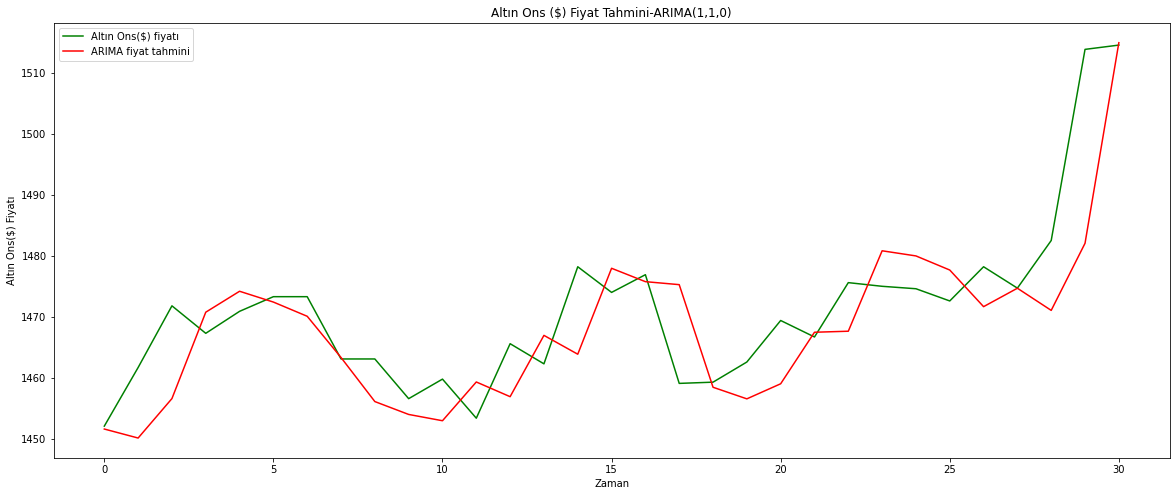

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(Gold.tail(len(predictions)).values,color = 'green', label = 'Altın Ons($) fiyatı')
plt.plot(predictions,color = 'red', label = 'ARIMA fiyat tahmini')
plt.title('Altın Ons ($) Fiyat Tahmini-ARIMA(1,1,0)')
plt.xlabel('Zaman')
plt.ylabel('Altın Ons($) Fiyatı')
plt.legend()
plt.show()

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 41.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima
data=Gold[0:int(len(Gold)*0.9)]
model_autoARIMA = auto_arima(data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=5, max_q=3, # maximum p and q
m=365,              # frequency of series
d=None,           # let model determine 'd'
seasonal=True,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

ImportError: ignored

In [ ]:
#Modeling
# Build Model
model = ARIMA(data, order=(1,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())